In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix.csv', index_col=0)#loading the datstet
df.head() #getting the first 5 rows to conduct initial analysis of data


# filling the nan values as null as i am getting error while unnesting the names in director and cast to seperate columns
def no_null(x):
    if pd.isna(x):
        return "unknown"
    else:
        return x
df['cast'] = df['cast'].apply(no_null)
df['director'] = df['director'].apply(no_null)


#unnesting the names of cast and director seperate columns:
#cast
dfc = df[['title', 'cast']].copy()#copying the cast and title columns to a new datafrme
dfc['cast'] = dfc['cast'].apply(lambda x:[c.strip() for c in x.split(',')])#splitting the cast names
dfc = dfc.explode('cast')#exploding cast for each row for the movie name
dfc
#director
dfd = df[['title', 'director']].copy()#copying the cast and title columns to a new datafrme
dfd['director'] = dfd['director'].apply(lambda x:[c.strip() for c in x.split(',')])#splitting the cast names
dfd = dfd.explode('director')#exploding cast for each row for the movie name
dfd

#merging the df's:
merged =  pd.merge(dfc,dfd, on='title', how='inner')
df = pd.merge(df,merged, on = 'title', how = 'inner').drop(columns=['cast_x','director_x']).rename(columns={'cast_y':'cast','director_y':'director'})
df.drop(columns=['description'], inplace=True) #dropping he description column

#spliting the df into two based on the type as it is only having 2 unique values Movie and TV show:
movies_df = df[df['type']== 'Movie'].reset_index(drop=True)
tv_df = df[df['type']== 'TV Show'].reset_index(drop=True)

#**************************************************************movie dataframe**********************************************************************
##plot a chart for the number of movies produced in each country
movies_df.head()
movies_df = movies_df.fillna('unknown')#filling Nan values with string
movies_df['country'].str.contains(',').sum()#checking comma seperated values in country series
movies_df['country'] = movies_df['country'].apply(lambda x:[i.strip().lower() for i in x.split(',')])#split the countries without commas
movies_df#further cleaned movie dataframe

##plot a chart to get top countries in movie production:

movies_df_country = movies_df.copy()#deep copied cleaned movie df to perform analysis
country_m = movies_df_country.explode('country')#add the seperated country to each row into the dataframe country_m
country_m= country_m.groupby('country')['title'].nunique().reset_index()#groups the df by country for the number of unique count of title
country_m = country_m.rename(columns={'title':'movie_count'})#renaming column name
country_m.sort_values(by='movie_count', ascending=False, inplace=True)#sorting the countries with more number of movies
country_m = country_m.drop(112).reset_index(drop=True)
print('top 10 countries in movie production:')
country_m = country_m.head(11)


##plot a chart for the most number of movie genres produced in each country:

movies_df_genre = movies_df.copy()
movies_df_genre['listed_in'].str.contains(',').sum()
movies_df_genre['genre'] = movies_df_genre['listed_in'].apply(lambda x:[i.strip().lower() for i in x.split(',')])#split the genre tries without commas
movies_df_genre = movies_df_genre.explode('genre')
movies_df_genre = movies_df_genre.explode('country')
movies_df_genre.drop(columns='listed_in',inplace=True)
top_genre_m = movies_df_genre['genre'].value_counts().head(10).index.tolist()#top 10 genre
movies_df_genre = movies_df_genre[movies_df_genre['genre'].isin(top_genre_m)]#applying top10 genre to get the movies with top 10 genre
genre_dfm = movies_df_genre.groupby(['country', 'genre'])['title'].nunique().reset_index()
genre_dfm.rename(columns={'title':'movie_count'}, inplace= True)
genre_dfm = pd.merge(country_m, genre_dfm, on = ['country'], how = 'inner')
genre_dfm.rename(columns={'movie_count_x':'movie_count_countries'}, inplace=True)
genre_dfm.rename(columns={'movie_count_y':'movie_count_genre'}, inplace=True)
genre_dfm.sort_values(by='movie_count_genre', ascending=False,inplace = True)
genre_dfm

##plot a chart for the top actors in country:

movies_df_cast = movies_df.copy()
movies_df_cast = movies_df_cast.explode('cast')
movies_df_cast  = movies_df_cast[movies_df_cast['cast']!='unknown']
movies_df_cast = movies_df_cast.drop_duplicates(subset=['title', 'cast'])
movies_df_cast = movies_df_cast.explode('country')
movies_df_cast = movies_df_cast[movies_df_cast['country'].isin(country_m['country'])]
movies_df_cast

top_cast_m = movies_df_cast.groupby(['country','cast']).size().reset_index(name='count')
top_cast_m  = top_cast_m.sort_values(by=['country', 'count'], ascending=[True,False]).reset_index(drop=True)
top_cast_m = top_cast_m.groupby('country')
top_cast_m = top_cast_m.head(5)




##plot a chart for the top director in country:

movies_df_dir = movies_df.copy()
movies_df_dir = movies_df_dir.explode('director')
movies_df_dir  = movies_df_dir[movies_df_dir['director']!='unknown']
movies_df_dir = movies_df_dir.drop_duplicates(subset=['title', 'cast'])
movies_df_dir = movies_df_dir.explode('country')
movies_df_dir = movies_df_dir[movies_df_dir['country'].isin(country_m['country'])]
movies_df_dir

top_dir_m = movies_df_dir.groupby(['country','director']).size().reset_index(name='count')
top_dir_m  = top_dir_m.sort_values(by=['country', 'count'], ascending=[True,False]).reset_index(drop=True)
top_dir_m = top_dir_m.groupby('country')
top_dir_m = top_dir_m.head(5)





# #**************************************************************TV show dataframe**********************************************************************


##plot a chart for the number of shows produced in each country
tv_df.head()
tv_df = tv_df.fillna('unknown')#filling Nan values with string
tv_df['country'].str.contains(',').sum()#checking comma seperated values in country series
tv_df['country'] = tv_df['country'].apply(lambda x:[i.strip().lower() for i in x.split(',')])#split the countries without commas
tv_df#further cleaned show dataframe

##plot a chart to get top countries in movie production:

tv_df_country = tv_df.copy()#deep copied cleaned movie df to perform analysis
country_t = tv_df_country.explode('country')#add the seperated country to each row into the dataframe country_m
country_t= country_t.groupby('country')['title'].nunique().reset_index()#groups the df by country for the number of unique count of title
country_t = country_t.rename(columns={'title':'show_count'})#renaming column name
country_t.sort_values(by='show_count', ascending=False, inplace=True)#sorting the countries with more number of movies
country_t = country_t[country_t['country']!='unknown']
#country_t = country_t.drop(112).reset_index(drop=True)
print('top 10 countries in Tv show production:')
country_t = country_t.head(11)
print(country_t)


##plot a chart for the most number of movie genres produced in each country:

tv_df_genre = tv_df.copy()
tv_df_genre['listed_in'].str.contains(',').sum()
tv_df_genre['genre'] = tv_df_genre['listed_in'].apply(lambda x:[i.strip().lower() for i in x.split(',')])#split the genre tries without commas
tv_df_genre = tv_df_genre.explode('genre')
tv_df_genre = tv_df_genre.explode('country')
tv_df_genre.drop(columns='listed_in',inplace=True)
top_genre_t = tv_df_genre['genre'].value_counts().head(10).index.tolist()#top 10 genre
tv_df_genre = tv_df_genre[tv_df_genre['genre'].isin(top_genre_t)]#applying top10 genre to get the movies with top 10 genre
genre_dft = tv_df_genre.groupby(['country', 'genre'])['title'].nunique().reset_index()
genre_dft.rename(columns={'title':'show_count'}, inplace= True)
genre_dft = pd.merge(country_t, genre_dft, on = ['country'], how = 'inner')
genre_dft.rename(columns={'show_count_x':'show_count_countries'}, inplace=True)
genre_dft.rename(columns={'show_count_y':'show_count_genre'}, inplace=True)
genre_dft.sort_values(by='show_count_genre', ascending=False,inplace = True)
genre_dft


##plot a chart for the top actors and directors:

tv_df_cast = tv_df.copy()
tv_df_cast = tv_df_cast.explode('cast')
tv_df_cast  = tv_df_cast[tv_df_cast['cast']!='unknown']
#tv_df_temp = tv_df_temp.drop_duplicates(subset=['title', 'cast'])
tv_df_cast = tv_df_cast.explode('country')
tv_df_cast = tv_df_cast[tv_df_cast['country'].isin(country_t['country'])]
tv_df_cast

top_cast_t = tv_df_cast.groupby(['country','cast']).size().reset_index(name='count')
top_cast_t  = top_cast_t.sort_values(by=['country', 'count'], ascending=[True,False]).reset_index(drop=True)
top_cast_t = top_cast_t.groupby('country')
top_cast_t = top_cast_t.head(5)



#top directors in each country:
tv_df_dir = tv_df.copy()
tv_df_dir = tv_df_dir.explode('director')
tv_df_dir  = tv_df_dir[tv_df_dir['director']!='unknown']
tv_df_dir = tv_df_dir.drop_duplicates(subset=['title', 'cast'])
tv_df_dir = tv_df_dir.explode('country')
tv_df_dir = tv_df_dir[tv_df_dir['country'].isin(country_t['country'])]
tv_df_dir

top_dir_t = tv_df_dir.groupby(['country','director']).size().reset_index(name='count')
top_dir_t  = top_dir_t.sort_values(by=['country', 'count'], ascending=[True,False]).reset_index(drop=True)
top_dir_t = top_dir_t.groupby('country')
top_dir_t = top_dir_t.head(5)



#***********************************************************************date operations**********************************************************

#best time to add movies to netflix:
movies_df_date = movies_df.copy()
movies_df_date.dropna(subset=['date_added'])
movies_df_date = movies_df_date[movies_df_date['release_year'].astype(int) > 2019]
movies_df_date['release_date'] = pd.to_datetime(movies_df_date['release_year'].astype(int).astype(str) +'-01-01')
movies_df_date['date_added'] = pd.to_datetime(movies_df_date['date_added'])
movies_df_date['best_date'] = (movies_df_date['date_added'] - movies_df_date['release_date']).dt.days
print(movies_df_date['best_date'].mode()[0])



#best time to add tv shows to netflix:
tv_df_date = tv_df.copy()

tv_df_date['date_added'] = pd.to_datetime(tv_df_date['date_added'], errors='coerce')
tv_df_date = tv_df_date.dropna(subset=['date_added'])
tv_df_date['added_month'] = tv_df_date['date_added'].dt.strftime('%B')
tv_df_date.head()
best_month = tv_df_date.groupby('added_month')['title'].nunique().reset_index()
best_month.rename(columns={'title':'show_count'},inplace=True)
best_month = best_month.sort_values(by='show_count', ascending=False)




top 10 countries in movie production:
top 10 countries in Tv show production:
           country  show_count
63   united states         938
62  united kingdom         272
30           japan         199
52     south korea         170
8           canada         126
19          france          90
25           india          84
57          taiwan          70
2        australia          66
53           spain          61
38          mexico          58
105


In [206]:
print(f"shape of the dataframe before structuring:{df.shape}\n")
print(f"number of unique values in each column \n {df.nunique()}\n")#get the aggregrated values to get the proper understanding of data
print(f"shape of the dataframe after structuring:{df.shape}\n"),print(f"no of movies :{df[df['type']== 'Movie'].shape}")
print(f"no of tv shows :{df[df['type']== 'TV Show'].shape}\n")



shape of the dataframe before structuring:(70812, 10)

number of unique values in each column 
 type                2
title            8807
country           748
date_added       1767
release_year       74
rating             17
duration          220
listed_in         514
cast            36440
director         4994
dtype: int64

shape of the dataframe after structuring:(70812, 10)

no of movies :(50098, 10)
no of tv shows :(20714, 10)



**Insights:**

*   In the original dataframe the type column was is having only two types movies and tv shows, so dividing the dataframe into two seperate dataframe one for movies and another for tv show will be easy to perform analysis.
*   after splitting the original df into two the movies dataframe having "***50098***" rows is greater than tv dataframe with "***20714***".

**Suggestions:**


*   Netflix should focus on adding more TV shows along with the movies
  








No of unique values of each category:
    column_name  unique_count
0          type             2
1         title          8807
2       country           748
3    date_added          1767
4  release_year            74
5        rating            17
6      duration           220
7     listed_in           514
8          cast         36440
9      director          4994 



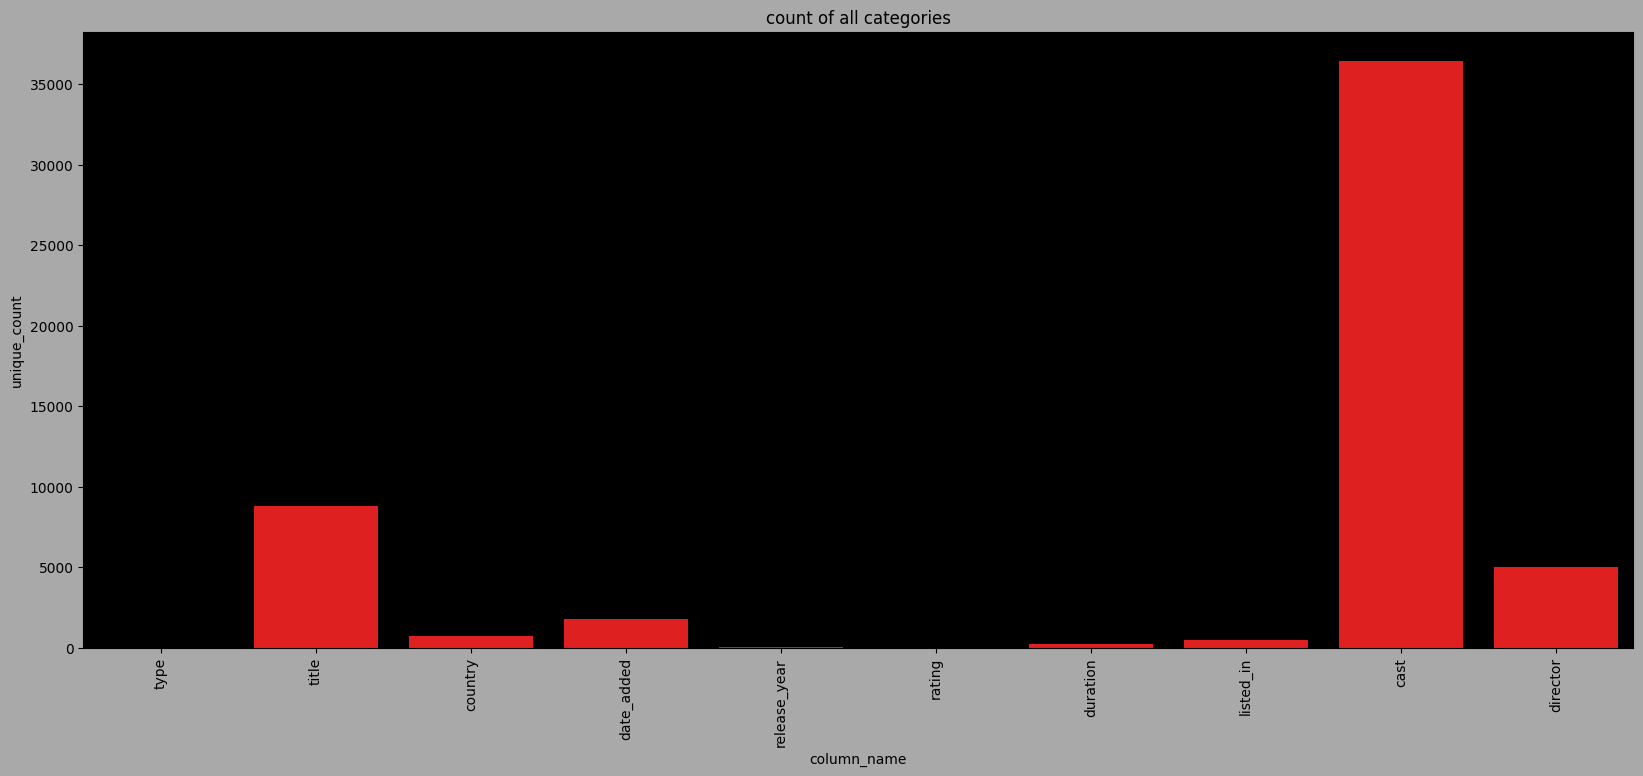

In [207]:
##ploting chart to visualize the uniq count of all categories:
unique = pd.DataFrame(df.nunique()) #dataframe of unique values
unique = unique.rename(columns={ 0:'unique_count'}).reset_index().rename(columns={'index':'column_name'})#renaming columns
print("No of unique values of each category:")
print(unique,"\n")
#chart
fig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
plt.title("count of all categories")
plt.xticks(rotation=90)
sns.barplot(x = 'column_name', y='unique_count', data= unique, color='red')
plt.show()


           country  movie_count
0    united states         2752
1            india          962
2   united kingdom          534
3           canada          319
4           france          303
5          germany          182
6            spain          171
7            japan          119
8            china          114
9           mexico          111
10           egypt          102 

           country  show_count
63   united states         938
62  united kingdom         272
30           japan         199
52     south korea         170
8           canada         126
19          france          90
25           india          84
57          taiwan          70
2        australia          66
53           spain          61
38          mexico          58 

Top countries in movie and tv production 
           country movie_count show_count
0        australia          NA       66.0
1           canada       319.0      126.0
2            china       114.0         NA
3            egypt       102.0

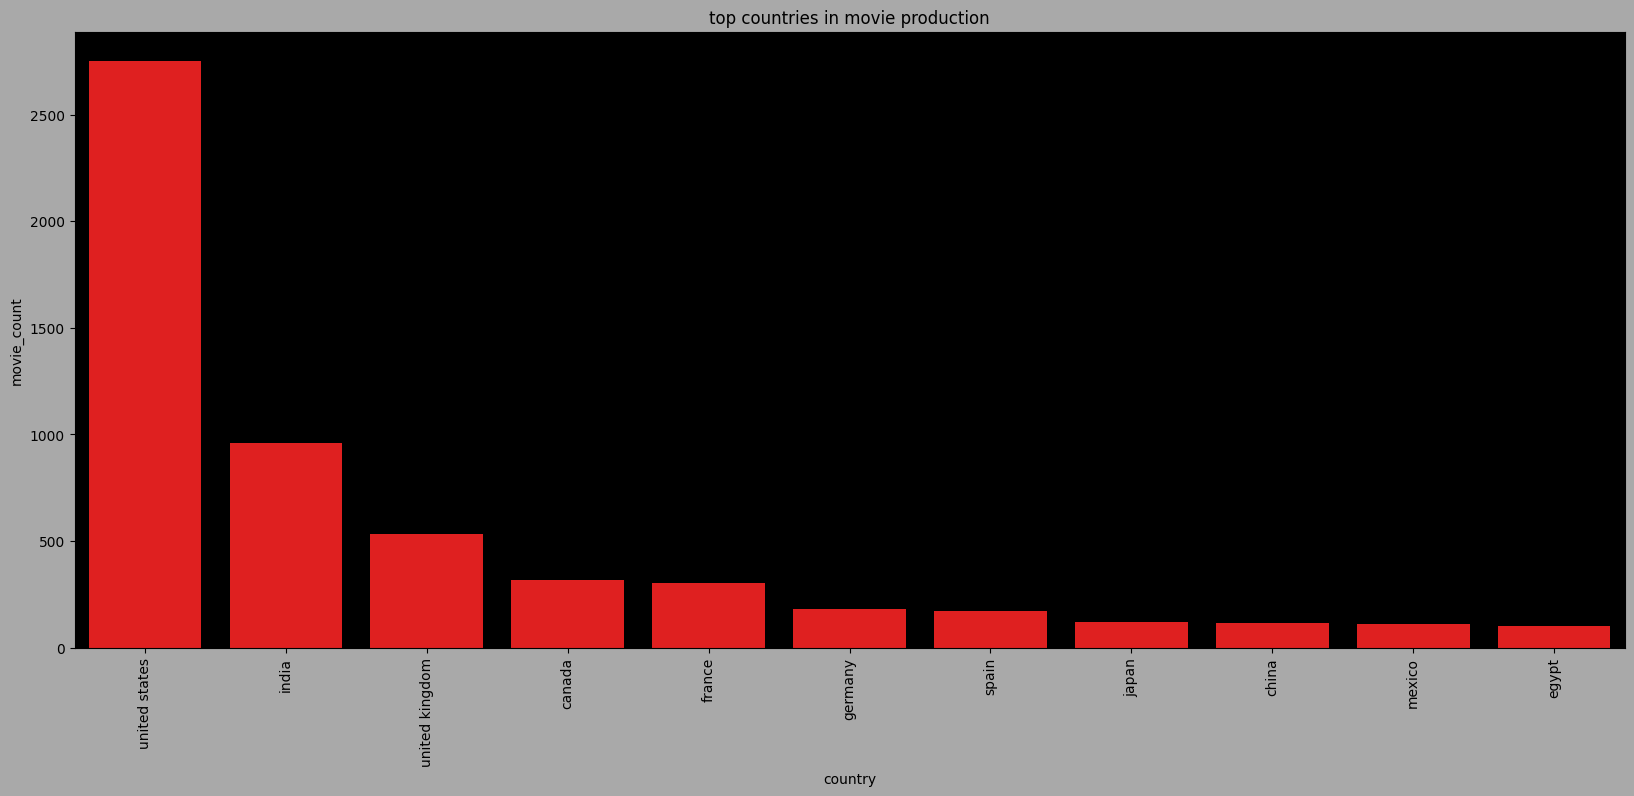

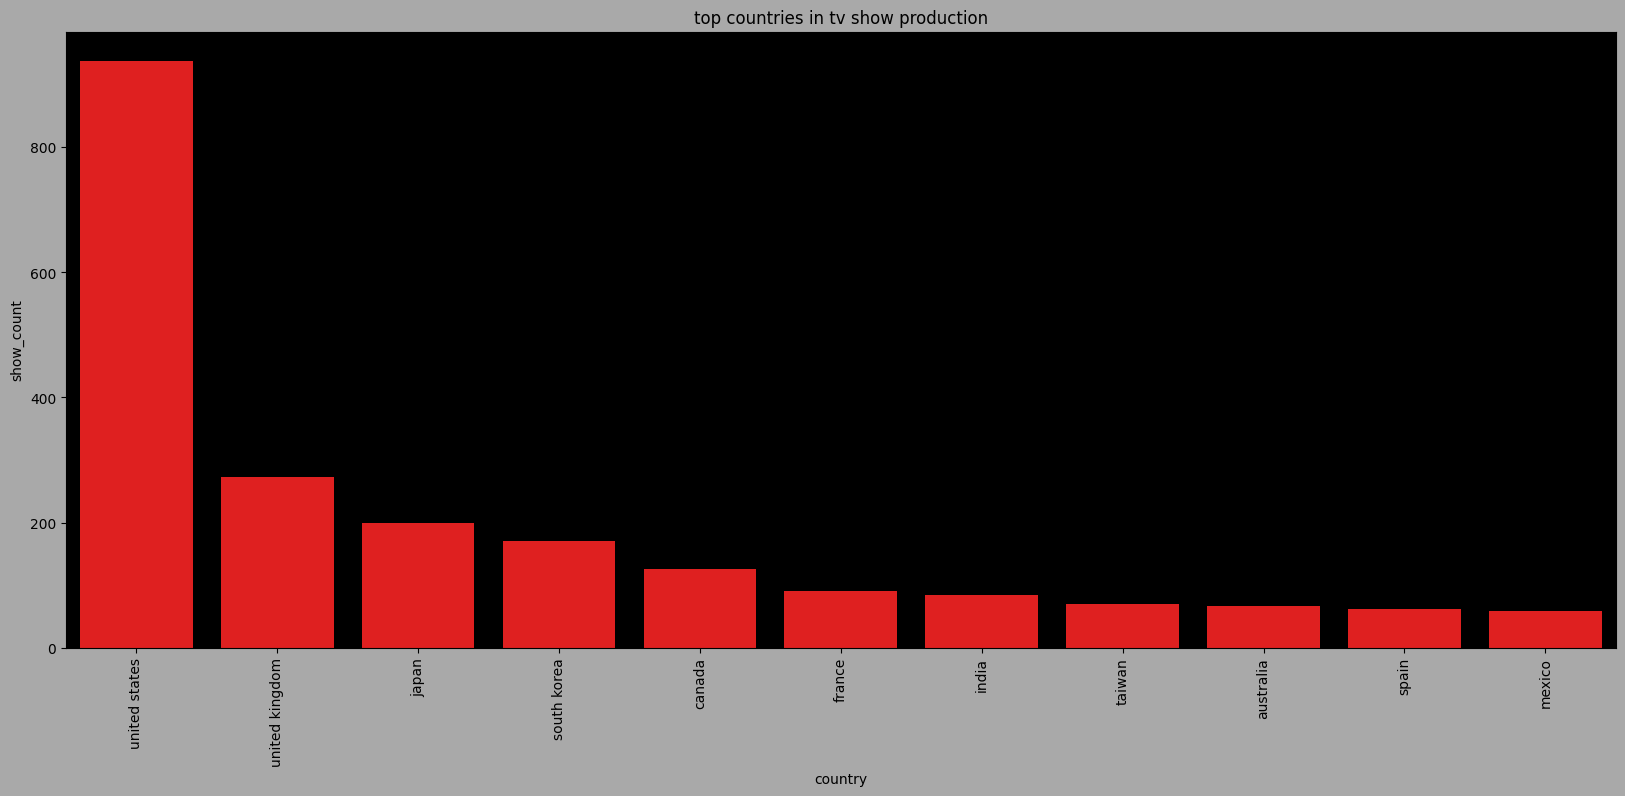

In [208]:
print(country_m,'\n')
print(country_t,'\n')
country_tm = pd.merge(country_m, country_t, on=['country'], how='outer').fillna('NA')
print(f'Top countries in movie and tv production \n{country_tm}\n')

#chart for top countries in movie production"
fig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
plt.title("top countries in movie production")
sns.barplot(x = 'country', y='movie_count', data = country_m, color='red')
plt.xticks(rotation = 90)
plt.show()
print('\n')

#chart for top countries in show production

fig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
plt.title("top countries in tv show production")
sns.barplot(x = 'country', y='show_count', data = country_t, color='red')
plt.xticks(rotation = 90)
plt.show('\n')


**Insights**:


*   In case of the top 10 countries in movie production the top 3 places are secured by United States, India and United Kingdom,followed by Canada,France,Germany,Spain,Japan and Mexico in the following positions.

*   Similarly in case of tv shows aslo United States secures the first position followed by United Kingdom in the second and Japan in the third followed by South Korea,Canada,France,,India,taiwan,Australis,Spain and Mexico in the following positions.

*   From the list of top countries in movie production China and Egypt didnt have any place in Tv show production

*   Similarly from the top countries in tv show production Australia,South Korea and Taiwan didnt have any pace in movie production.

**Suggestions**:

*   We could see that in top movie producing countries India holds the second position and yet the total movies produced in india is "962" which is lower than  half the number of movies produced in United states , So it is suggested to add more Indian movies to the netflix.

*   Netflix should add more movies and tv shows produced by the United States and United Kingdom as both the countries were witin the first 3 position of movies and tv show production.


*  It is suggested to add more Japanese and South Korean Tv shows to the netflix as there is only a small difference in the number of tv shows produced by them (i.e) 199 shows from japan and 170 shows from South Korea.






top 10 movie genres produced globally: 
 ['dramas', 'international movies', 'comedies', 'action & adventure', 'independent movies', 'children & family movies', 'thrillers', 'romantic movies', 'horror movies', 'sci-fi & fantasy'] 

top 10 tv show genres produced globally: 
 ['international tv shows', 'tv dramas', 'tv comedies', 'crime tv shows', "kids' tv", 'romantic tv shows', 'anime series', 'tv action & adventure', 'spanish-language tv shows', 'british tv shows'] 



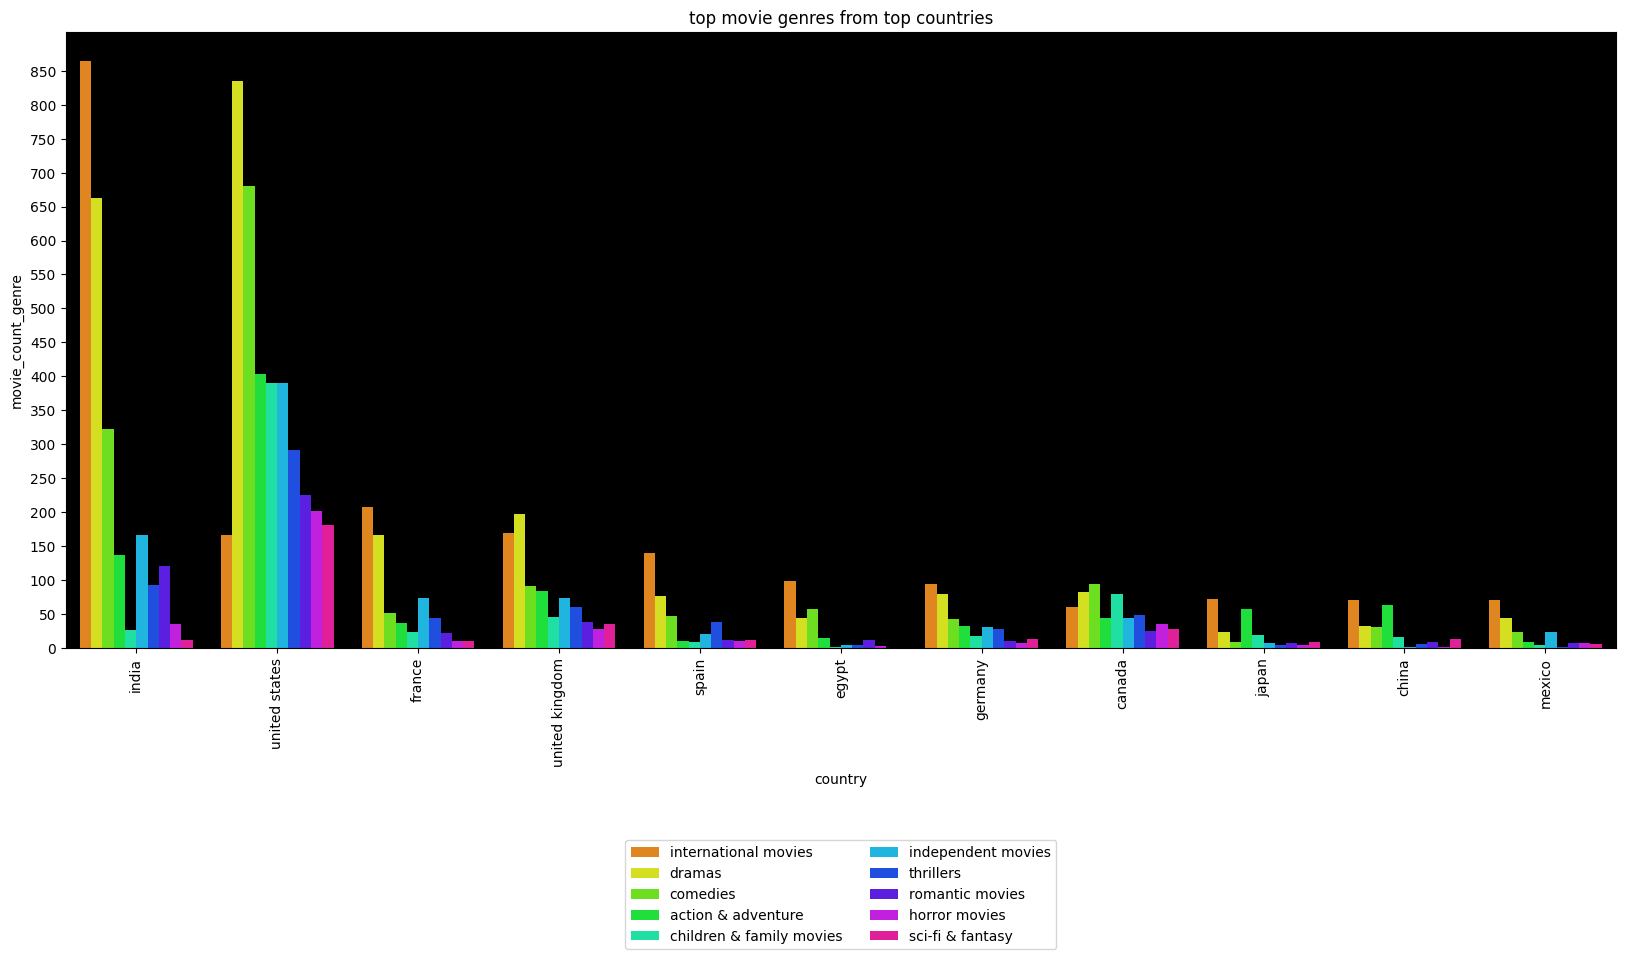

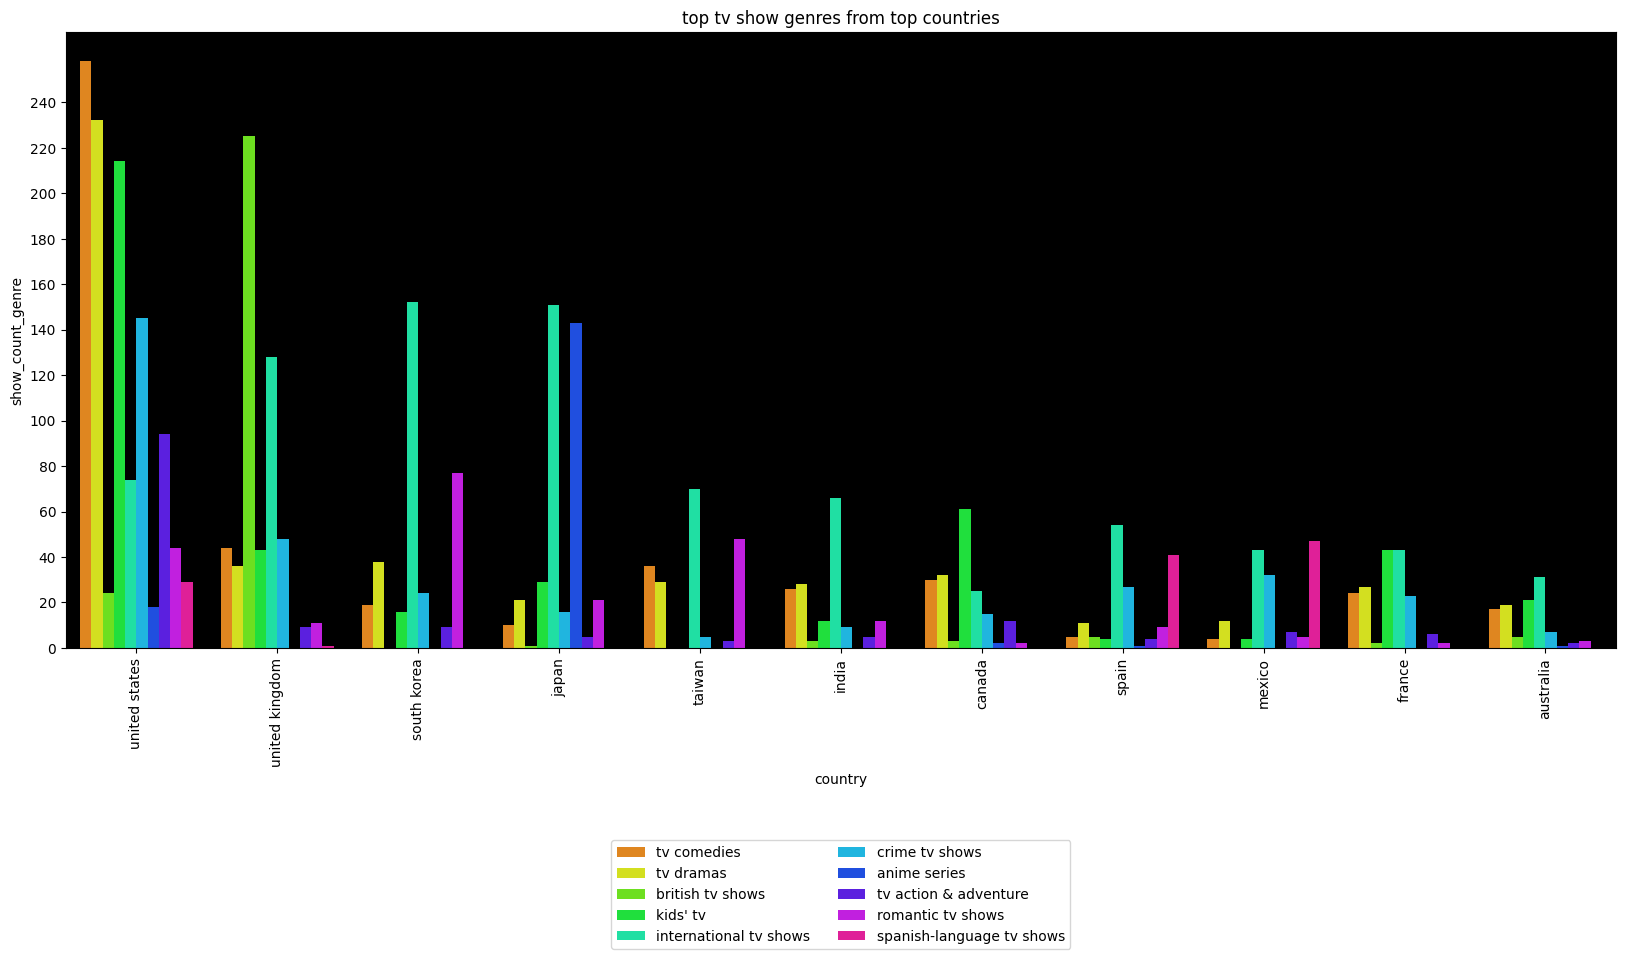

In [209]:
print(f"top 10 movie genres produced globally: \n {top_genre_m} \n")
print(f"top 10 tv show genres produced globally: \n {top_genre_t} \n")
#chart for top movie genre in top countries:
pig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
#cast_color = dict(zip(top_dir_t['director'].unique(),sns.color_palette('gist_ncar', len(top_dir_t['director'].unique()))))
#genre_color = sns.color_palette("hsv", n_colors=len(genre_dft['genre']))
sns.barplot(x = 'country',y = 'movie_count_genre', hue='genre', data = genre_dfm, palette='hsv')
plt.legend(loc= 'lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.title('top movie genres from top countries')
plt.xticks(rotation = 90)
ax.set_yticks(range(0, genre_dfm['movie_count_genre'].max() + 1, 50))
plt.show()

#chart for top tv show genre in top countries:
print('\n')
pig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
#cast_color = dict(zip(top_dir_t['director'].unique(),sns.color_palette('gist_ncar', len(top_dir_t['director'].unique()))))
#genre_color = sns.color_palette("hsv", n_colors=len(genre_dft['genre']))
sns.barplot(x = 'country',y = 'show_count_genre', hue='genre', data = genre_dft, palette='hsv')
plt.legend(loc= 'lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.title('top tv show genres from top countries')
plt.xticks(rotation = 90)
ax.set_yticks(range(0, genre_dft['show_count_genre'].max() + 1, 20))
plt.show()


**Insights:**



*   From the chart of top produced movie genres we could see the "International movies" genre lies within the top 3 places in all the top countries.


*   Similarly in tv shows "International Tv shows" genre is produced more in the top countries except United States and United Kingdom.As United States produce tv shows more under 'Tv comedies' genre & United Kingdom focusses more in British Tv shows genre.





*   Japan is producing more anime shows than the international tv shows.


**Suggestions:**



*   Netflix should focus on adding more movies and tv shows under interantional genre as they lies within the first 3 places in the top countries.
* It is also suggested to add more Indian movies as they are using the drama genre more often than international movies.    




*  It is suggested to add more American dramas as they are producing more films and tv shows under this genre.
*   Other than dramas, international movies, it is suggested to add more action and comedy movies as thses genre are used more other than dramas and international movies genre.


*   netflix should add more kids tv shows from united states and United kingdom as they are producing more shows under this genre compared to other countries.
*   It is also suggested to add more japanese anime shows to netflix as they are producing more than 100 shows under this genre than any other shows under any other genres.














              country                    cast  count
0              canada      John Paul Tremblay     10
1              canada              Robb Wells     10
2              canada          John Dunsworth      9
3              canada            Michela Luci      7
4              canada              Mike Smith      7
2023            china              Donnie Yen     10
2024            china             Jackie Chan      8
2025            china               Simon Yam      6
2026            china                 Xing Yu      6
2027            china              Chang Chen      5
2786            egypt             Ahmed Helmy     13
2787            egypt            Hassan Hosny     13
2788            egypt         Ezzat Abou Aouf      8
2789            egypt        Mohammed Tharwat      8
2790            egypt           Bayoumi Fouad      7
3251           france          Wille Lindberg      5
3252           france          Benoît Magimel      4
3253           france          Blanche Gardin 

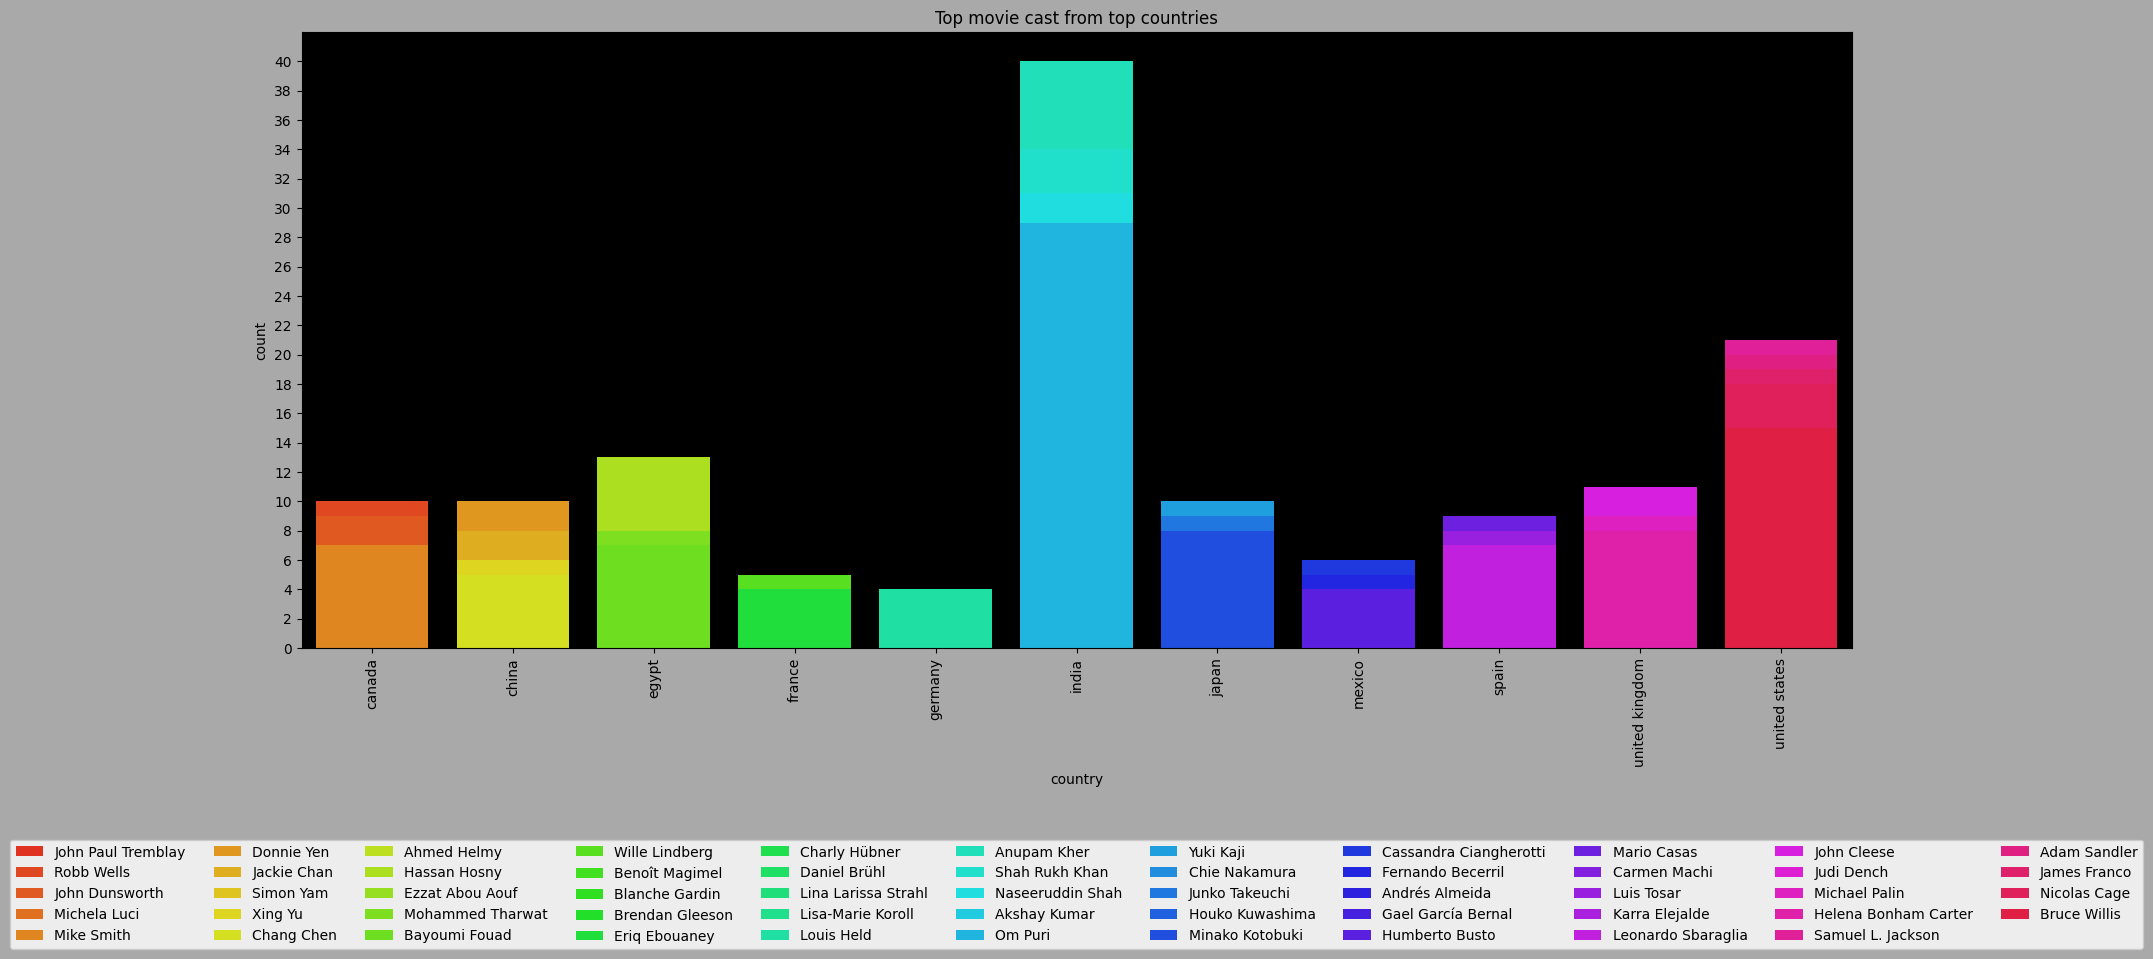

Top tv show cast from top countries: 

             country                   cast  count
0          australia       Alex Dimitriades      3
1          australia       Danielle Cormack      3
2          australia       Aaron L. McGrath      2
3          australia             Alex Babic      2
4          australia           Asher Keddie      2
425           canada     John Paul Tremblay      8
426           canada             Robb Wells      8
427           canada          Ashleigh Ball      7
428           canada         John Dunsworth      7
429           canada             Mike Smith      7
1325          france             Adil Dehbi      4
1326          france       Amandla Stenberg      4
1327          france          André Holland      4
1328          france        Benjamin Biolay      4
1329          france    Damian Nueva Cortes      4
1967           india                 Anjali     13
1968           india  Gautham Vasudev Menon     13
1969           india            Prakash Raj

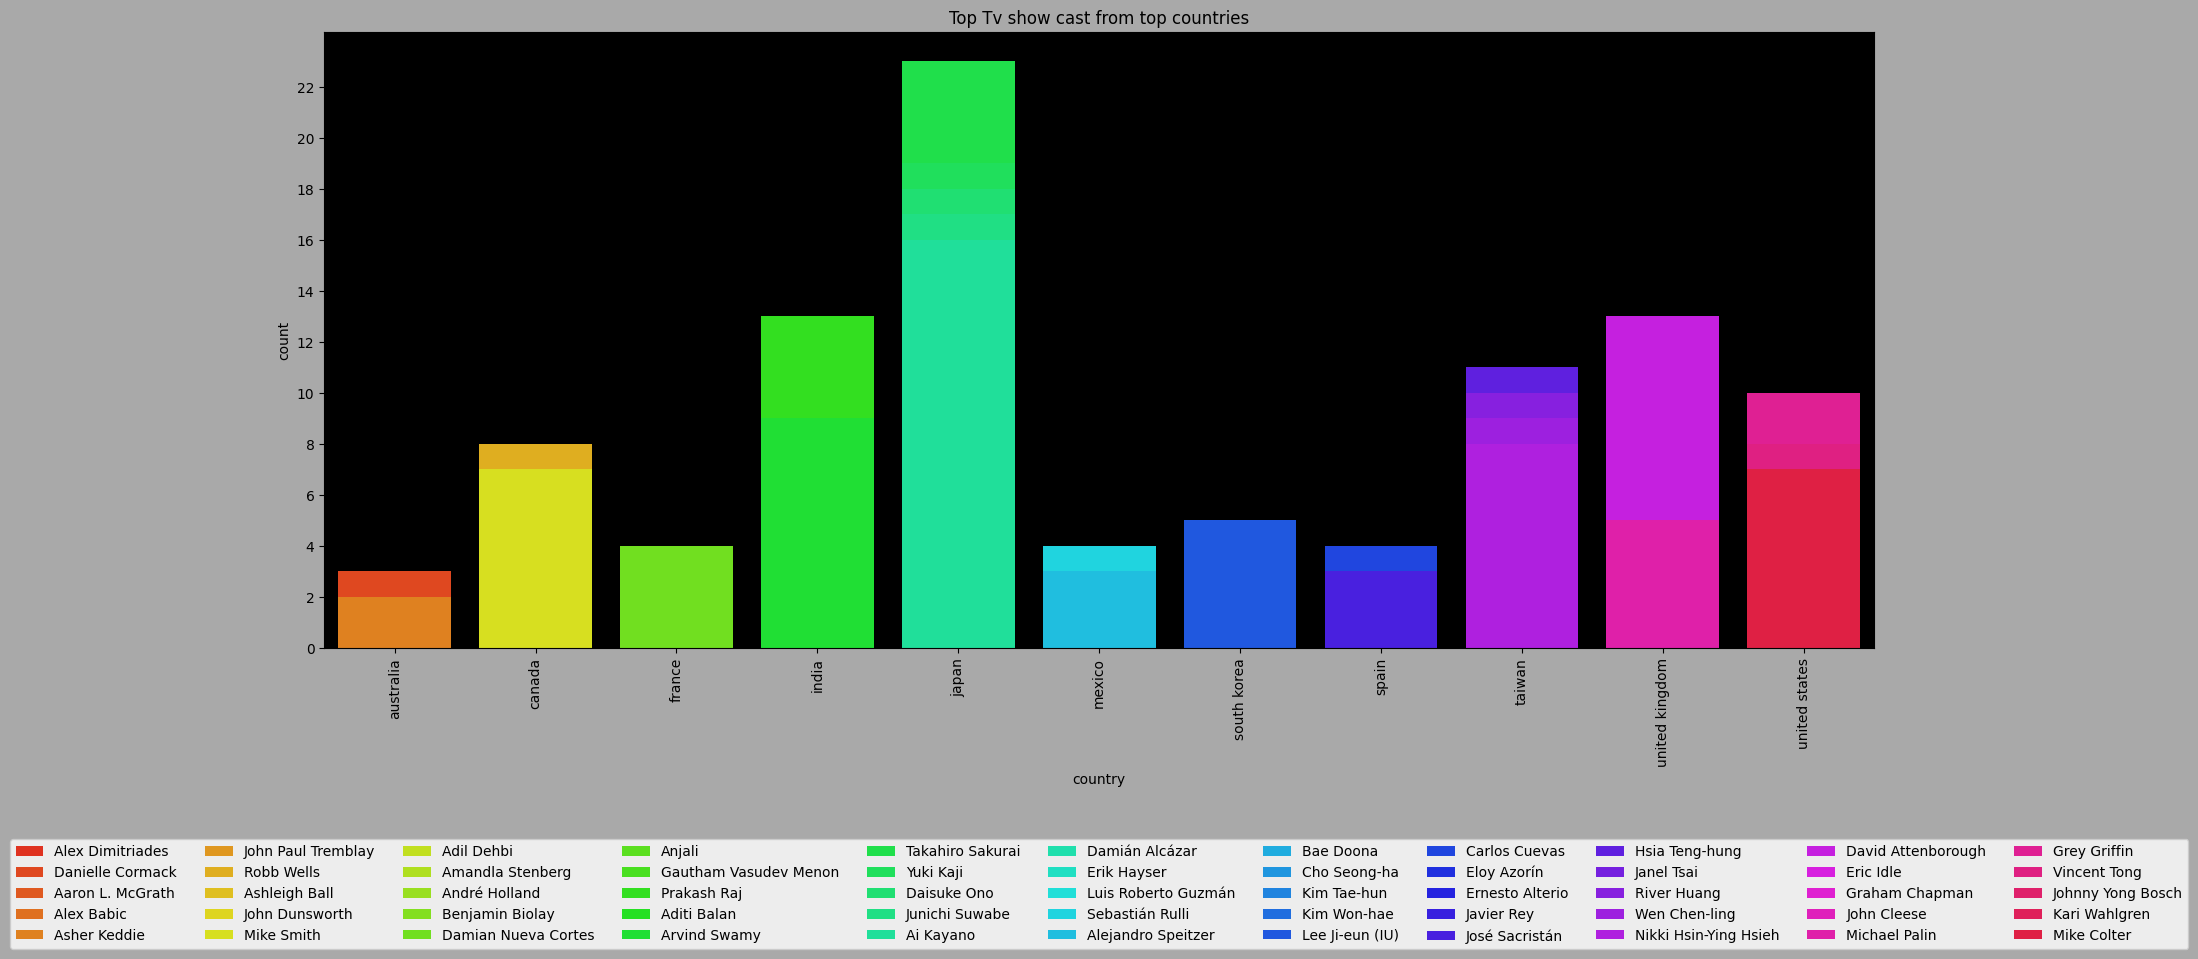

In [210]:
50
#Top movie cast in top countries
top_cast_m = top_cast_m.sort_values(by=['country','count'],ascending=[True,False])
print(top_cast_m)
#chart for top movie cast in top countries
print('\n')
fig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
cast_color = dict(zip(top_cast_m['cast'].unique(),sns.color_palette('hsv', len(top_cast_m['cast'].unique()))))
sns.barplot(x = 'country',y = 'count', hue='cast', data = top_cast_m, palette=cast_color,dodge=False)
plt.legend(loc= 'lower center', bbox_to_anchor=(0.5, -0.5), ncol=11)
plt.title('Top movie cast from top countries')
plt.xticks(rotation = 90)
ax.set_yticks(range(0, top_cast_m['count'].max() + 1, 2))
plt.show()

#Top Tv show cast in top countries
print("Top tv show cast from top countries:",'\n')
print(top_cast_t)
#chart for top tv show cast in top countries"
print('\n')
fig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
cast_color = dict(zip(top_cast_t['cast'].unique(),sns.color_palette('hsv', len(top_cast_t['cast'].unique()))))
sns.barplot(x = 'country',y = 'count', hue='cast', data = top_cast_t, palette=cast_color,dodge=False)
plt.legend(loc= 'lower center', bbox_to_anchor=(0.5, -0.5), ncol=11)
plt.title('Top Tv show cast from top countries')
plt.xticks(rotation = 90)
ax.set_yticks(range(0, top_cast_t['count'].max() + 1, 2))
plt.show()



**Suggestions**:



*   For the top 3 movie producing countries, netflix should focus on adding the movies of cast as stated below.

1.   United States-[Samuel.L Jackson, Adam Sandler,James Franco,Nicolas
Cage & Bruce,Willis]

2.   United Kingdom-[John Cleese, Judi Dench, Michael Palin, Brendan Gleeson & Helena Bonham Carter]

3.   India - [Anupam kher, Shah rukh khan, Naseeruddin Shah, Akshay Kumar , Om Puri]




---



*   Similarly for top 3 tv show producing countries , netflix should focus on adding tv shows of the  following cast.


1.   United States - [Grey Griffin, Vincent tong,Johnny yong bosch,Kari wahlgren & Mike colter]

2.   United Kingdom - [David Attenborough,Eric Idle,Garham Chapman,John Cleese & Michael Palin]

3.   Japan - [Takahiro Sakurai ,Yuki Kaji, Daisuke Ono, Junichi Suwabe & Ai Kayano]



Apart from this it is suggested to add the movies and tv shows of the top cast from other countries to increase the subscribers.




Top movie directors from top countries: 

             country                  director  count
0             canada          Mike Clattenburg     48
1             canada              Robert Vince     48
2             canada            Justin G. Dyck     39
3             canada              Raja Gosnell     30
4             canada          Steven C. Miller     27
270            china                Wilson Yip     50
271            china                Johnnie To     25
272            china                Corey Yuen     19
273            china                Benson Lee     17
274            china                 Dante Lam     16
373            egypt           Youssef Chahine    104
374            egypt           Sameh Abdulaziz     54
375            egypt              Khaled Marei     40
376            egypt                Wael Ehsan     32
377            egypt         Ahmed Nader Galal     30
430           france           Youssef Chahine     35
431           france            Thierry 

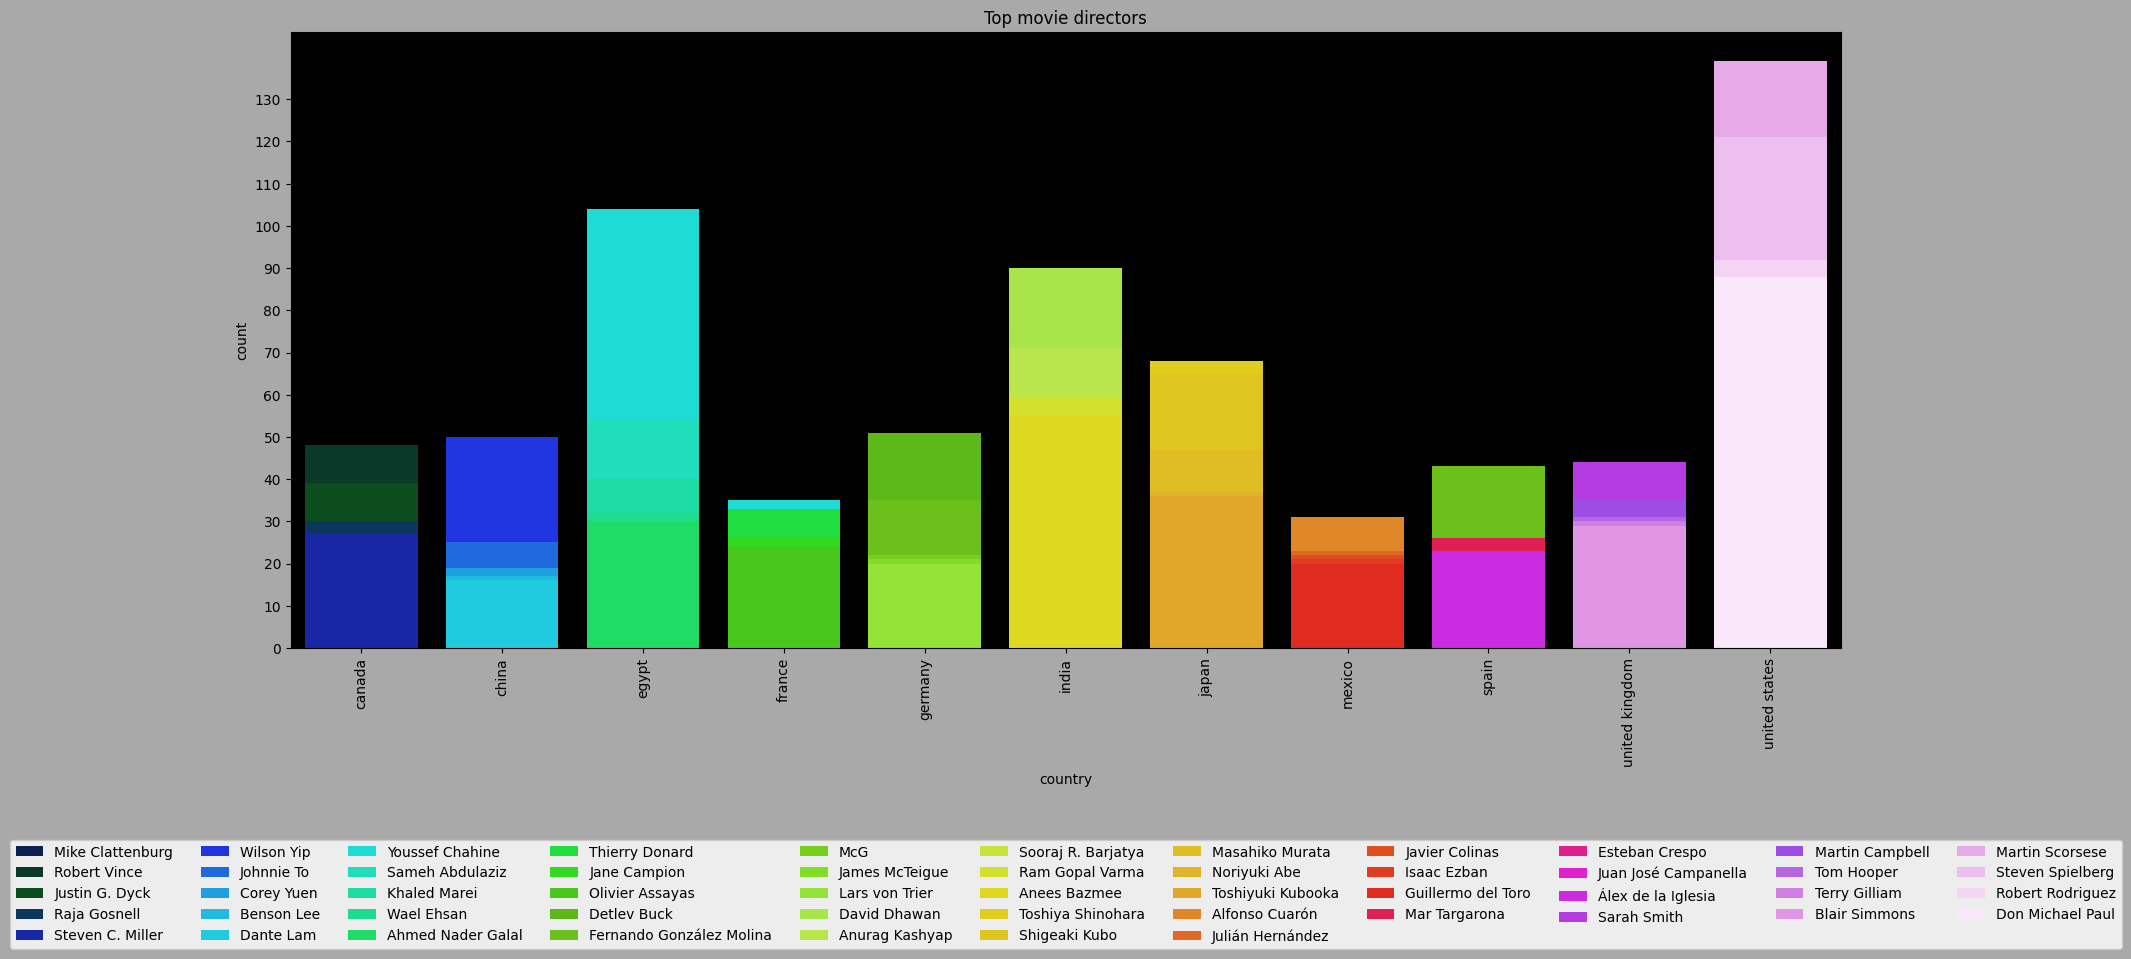

Top Tv show directors from top countries: 

            country                   director  count
0         australia                   Mat King      7
1            canada             Stefan Brogren     19
2            canada               Norm Hiscock     11
3            canada              Phil Sgriccia      9
4            canada                Kyran Kelly      7
5            canada             Guy Vasilovich      5
9            france              Thomas Astruc     20
10           france            Damien Chazelle     13
11           france              Ange Basterga      8
12           france         Olivier Jean-Marie      8
13           france               Ziad Doueiri      8
18            india              Bejoy Nambiar     22
19            india  Tharun Bhascker Dhaassyam     17
20            india              Sudha Kongara     11
21            india                Nizar Shafi      8
22            india            Soumendra Padhi      6
29            japan              Yasuh

<ipython-input-211-38f2c019b0e5>:26: UserWarning: The palette list has more values (51) than needed (45), which may not be intended.
  sns.barplot(x = 'country',y = 'count', hue='director', data = top_dir_t, palette=cast_color,dodge=False)


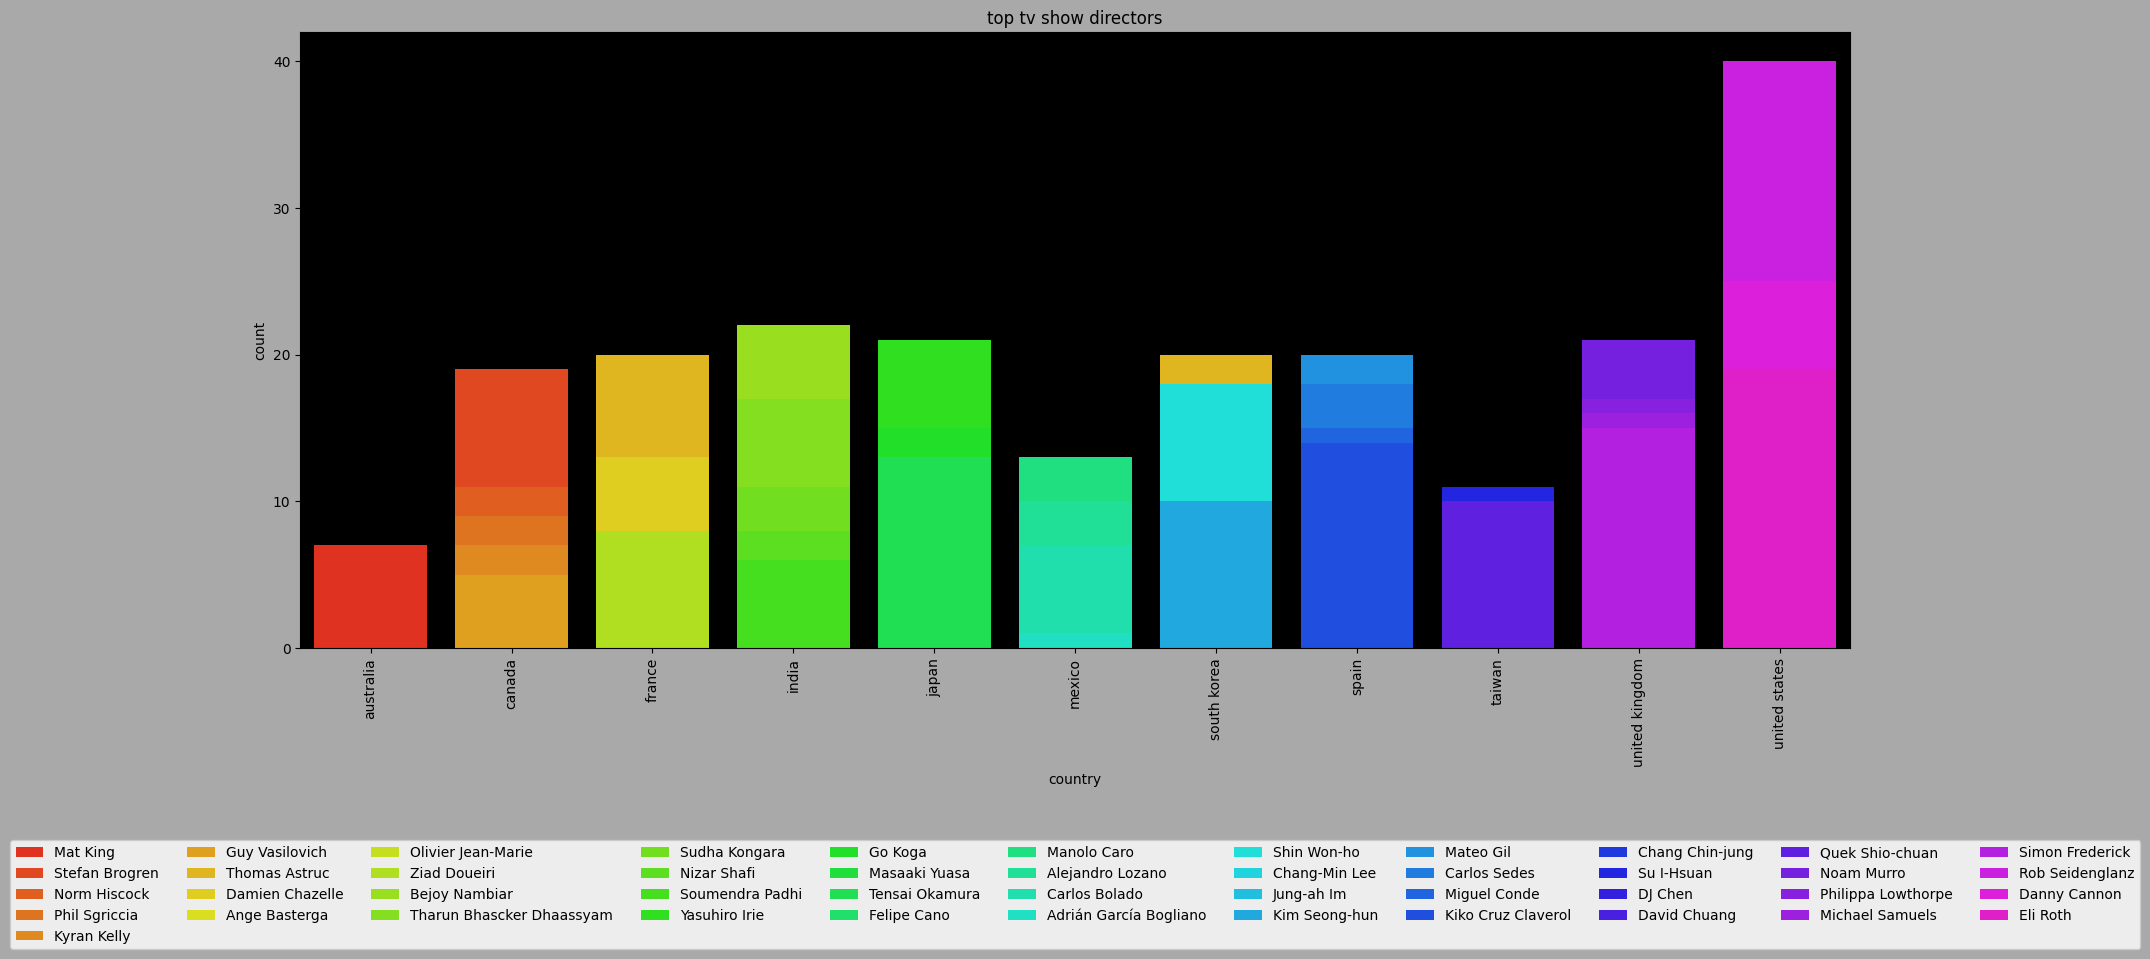

In [211]:
#show top movie directors from top countries:
print("Top movie directors from top countries:",'\n')
print(top_dir_m)
#chart for top  movie directors:
print('\n')
fig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
cast_color = dict(zip(top_dir_m['director'].unique(),sns.color_palette('gist_ncar', len(top_dir_m['director'].unique()))))
sns.barplot(x = 'country',y = 'count', hue='director', data = top_dir_m, palette=cast_color,dodge=False)
plt.legend(loc= 'lower center', bbox_to_anchor=(0.5, -0.5), ncol=11)
plt.xticks(rotation = 90)
plt.title('Top movie directors')
ax.set_yticks(range(0, top_dir_m['count'].max() + 1, 10))
plt.show()

#show top Tv show directors from top countries:
print("Top Tv show directors from top countries:",'\n')
print(top_dir_t)
#chart for top tv show directors:
print('\n')
fig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('darkgrey')
ax.set_facecolor('black')
cast_color = sns.color_palette("hsv", n_colors=len(top_dir_t['director']))
sns.barplot(x = 'country',y = 'count', hue='director', data = top_dir_t, palette=cast_color,dodge=False)
plt.legend(loc= 'lower center', bbox_to_anchor=(0.5, -0.5), ncol=11)
plt.title('top tv show directors')
plt.xticks(rotation = 90)
ax.set_yticks(range(0, top_dir_t['count'].max() + 1, 10))
plt.show()


**Suggestions**:



*   For the top 3 movie producing countries, netflix should focus on adding the following director's movies

1.   United States-[Martin Scorsese , Steven spielberg, Robert Rodriguez,Don Michael Paul & McG]

2.   United Kingdom-[Sarah Smith, Martin Campbell,Tom Hooper,Terry Gilliam & Blair Simmons]

3.   India - [David Dhawan, Anurag Kashyap, Sooraj R. Barjatya,Ram Gopal Varma & Anees Bazmee]



---




*   Similarly for top 3 tv show producing countries , netflix should focus on adding the following directors tv shows.


1.   United States - [Rob Seidenglanz, Danny Canon, Noam murro ,Thomas  Astruc & Eli Roth]

2.   United Kingdom - [Noam murro, Philippa Lowthorpe, Michael Samuels, Simon Frederick & Damien Chazelle]

3.   Japan - [Yasuhiro Irie,Thomas Astruc, Go Koga, Masaaki Yousaka & Tensai Okmura]
Apart from this it is suggested to add the movies and tv shows of the top directors from other countries to increase the subscribers.




In [212]:
print(f"it is suggested to add the movies after {movies_df_date['best_date'].mode()[0]} days from the day of release")
print(best_month['added_month'].head())

it is suggested to add the movies after 105 days from the day of release
5          July
2      December
11    September
6          June
1        August
Name: added_month, dtype: object


**Suggestion**:


*   it is suggested to add the movies after 105 days from the day of release as most of the movies were added to the netflix in this interval from the release date.

*   It is suggested to add the tv show in the month of july, December, September, June and August.

